In [1]:
%reset -f
from libraries_FIELDS import * 
from functions_FIELDS_withVelocity import *

Current Time = 08/07/23 16:14:54


In [2]:
pwd

'/Users/aartisingh/DSLgit'

Time now  =  15:44:45
Files are = 
pickle_files/Shout_meas_01-30-2023_15-40-55_1691364300.pickle
pickle_files/Shout_meas_01-30-2023_17-47-39_1691365051.pickle
pickle_files/Shout_meas_01-30-2023_19-53-09_1691365314.pickle
pickle_files/Shout_meas_01-30-2023_20-33-48_1691365153.pickle
pickle_files/Shout_meas_01-30-2023_21-29-33_1691365228.pickle
pickle_files/Shout_meas_02-03-2023_10-39-20_1691362174.pickle
pickle_files/Shout_meas_02-03-2023_12-55-47_1691362822.pickle
pickle_files/Shout_meas_02-03-2023_12-55-47_1691363823.pickle
pickle_files/Shout_meas_02-06-2023_14-29-39_1691361402.pickle
pickle_files/Shout_meas_02-09-2023_13-05-31_1691361232.pickle
pickle_files/Shout_meas_02-09-2023_15-08-10_1691360930.pickle
pickle_files/Shout_meas_02-09-2023_17-12-28_1691360722.pickle
pickle_files/Shout_meas_02-14-2023_08-37-53_1691365588.pickle
pickle_files/Shout_meas_02-14-2023_10-45-17_1691366036.pickle
pickle_files/Shout_meas_02-14-2023_12-48-02_1691366222.pickle
pickle_files/Shout_meas_02-14-2023_

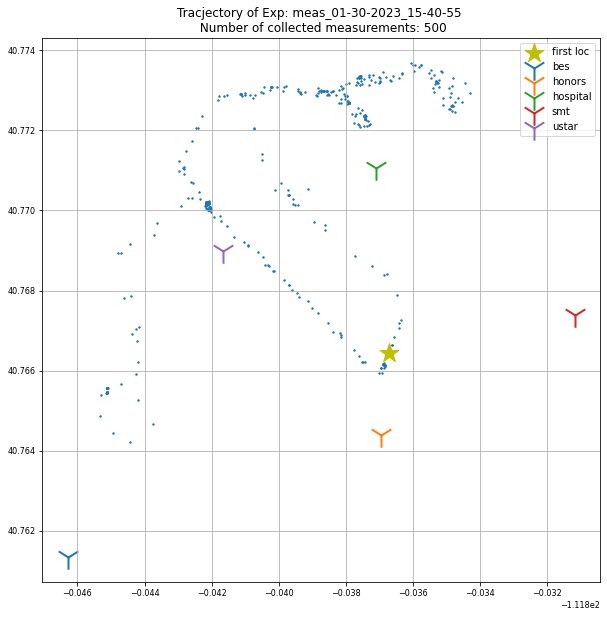

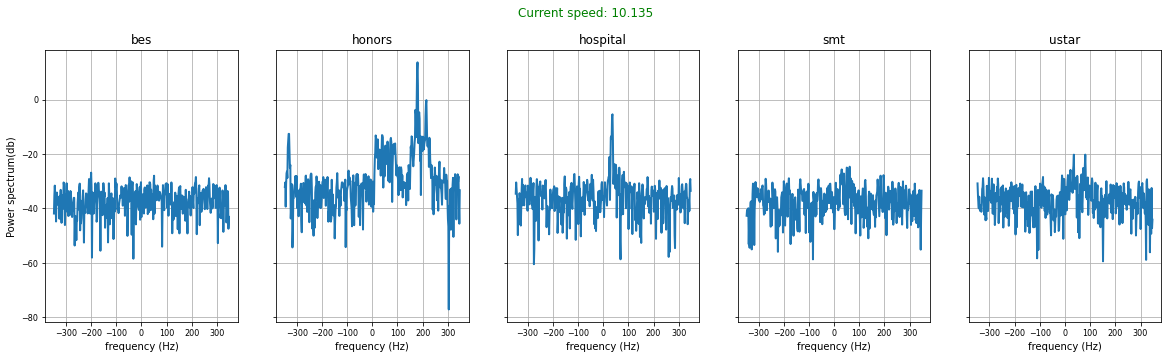

----------------------------------------------------------------------
 2 meas_01-30-2023_17-47-39 (500, 6)


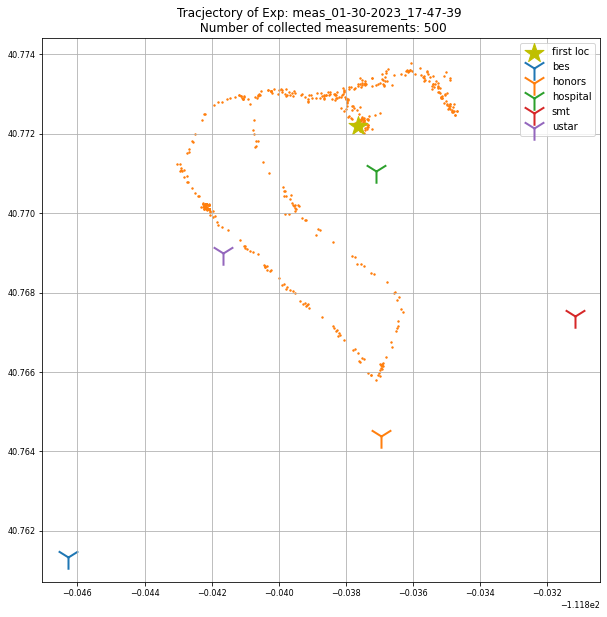

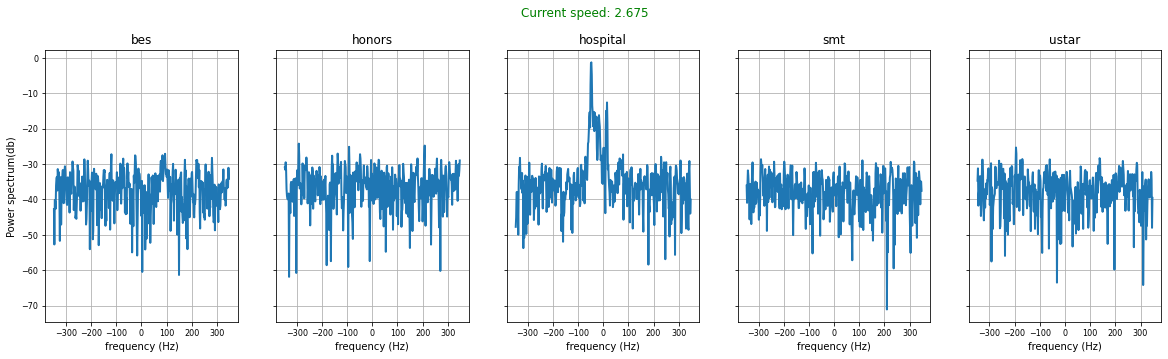

----------------------------------------------------------------------
 3 meas_01-30-2023_19-53-09 (156, 6)


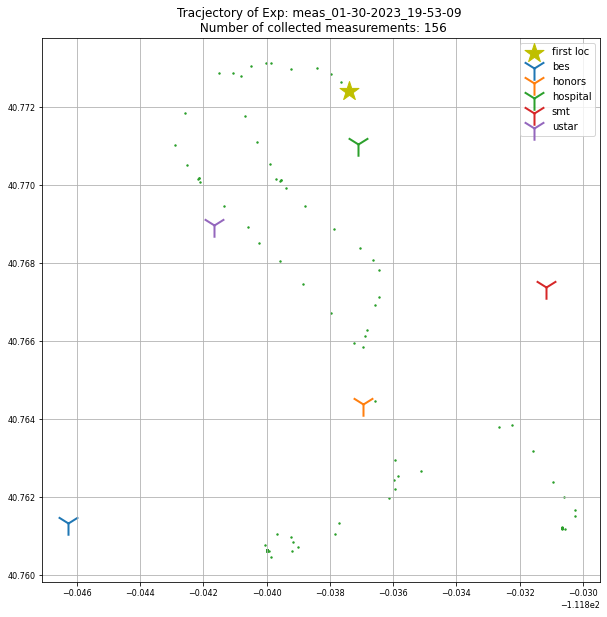

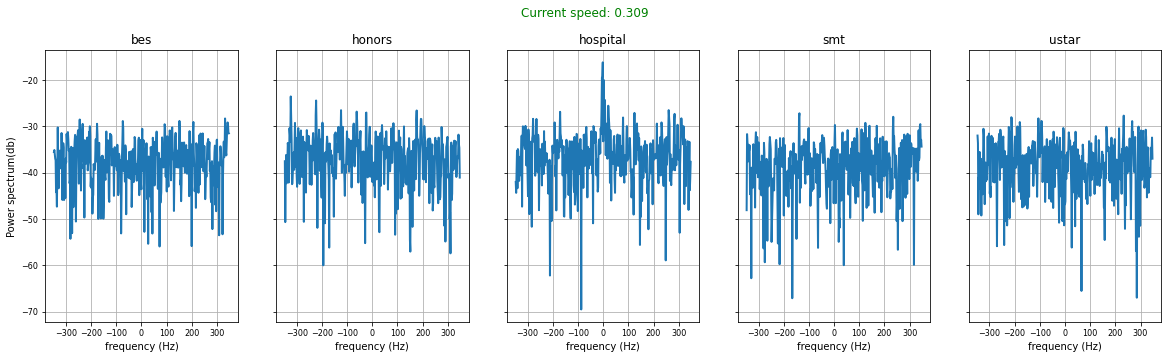

----------------------------------------------------------------------
 4 meas_01-30-2023_20-33-48 (200, 6)


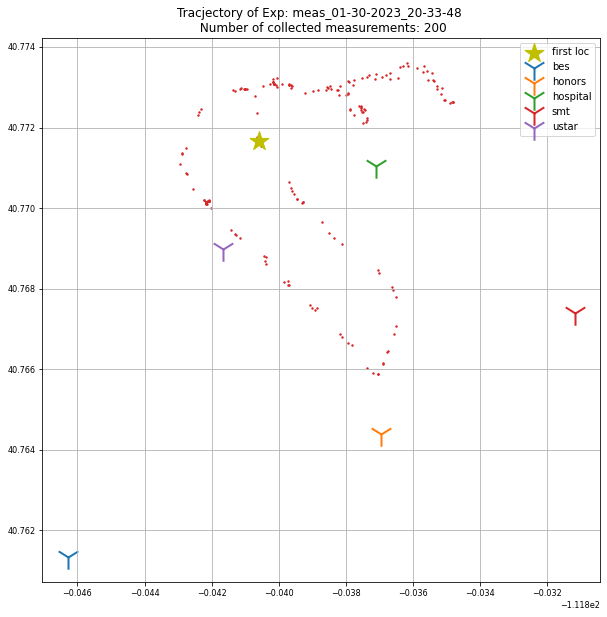

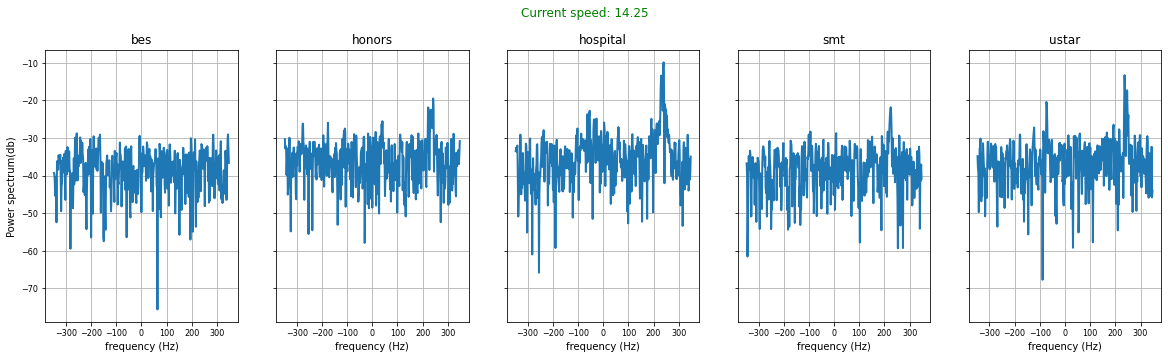

----------------------------------------------------------------------
 5 meas_01-30-2023_21-29-33 (162, 6)


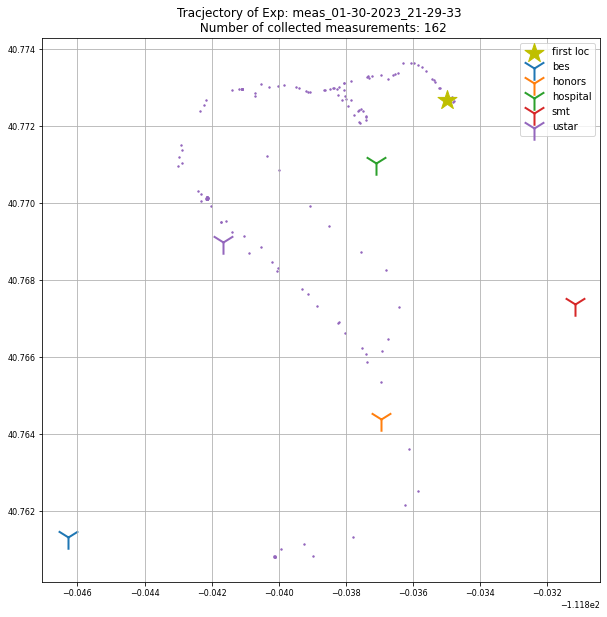

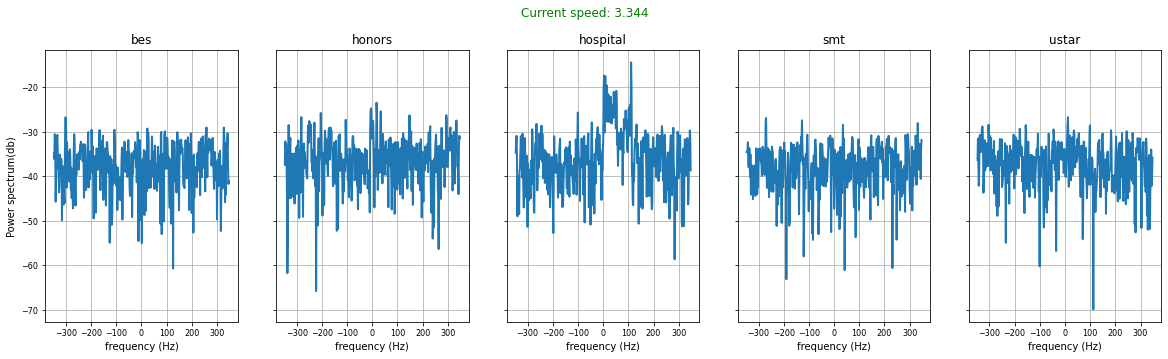

----------------------------------------------------------------------
 6 meas_02-03-2023_10-39-20 (500, 6)


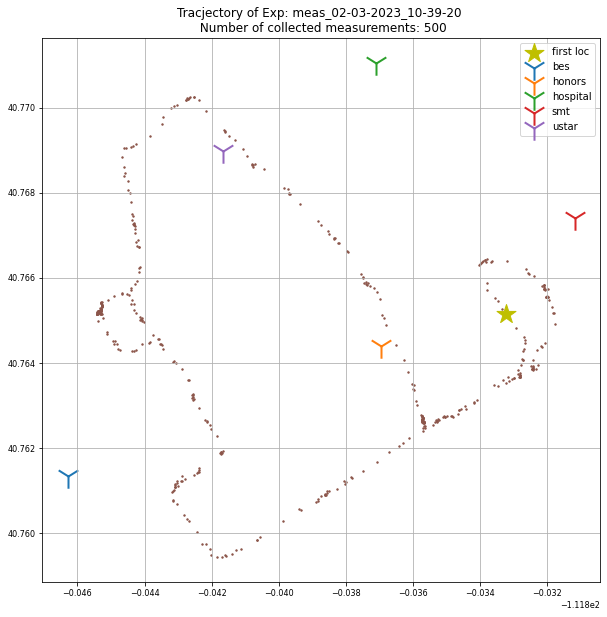

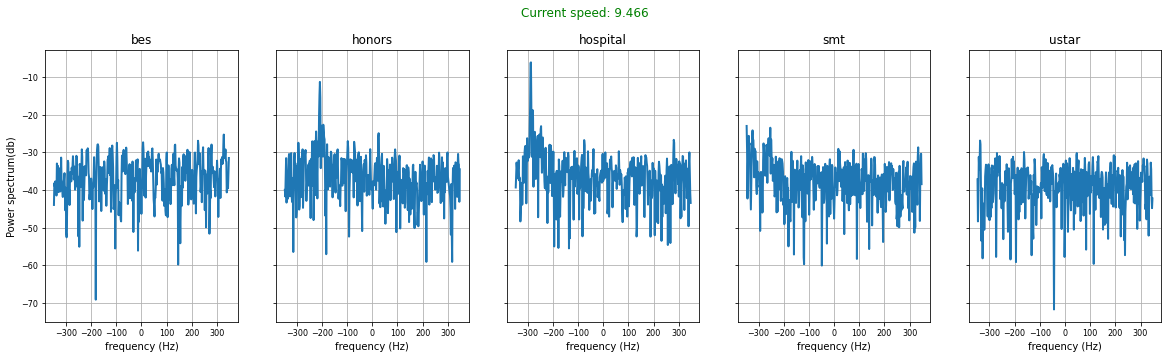

----------------------------------------------------------------------
 7 meas_02-03-2023_12-55-47 (750, 6)


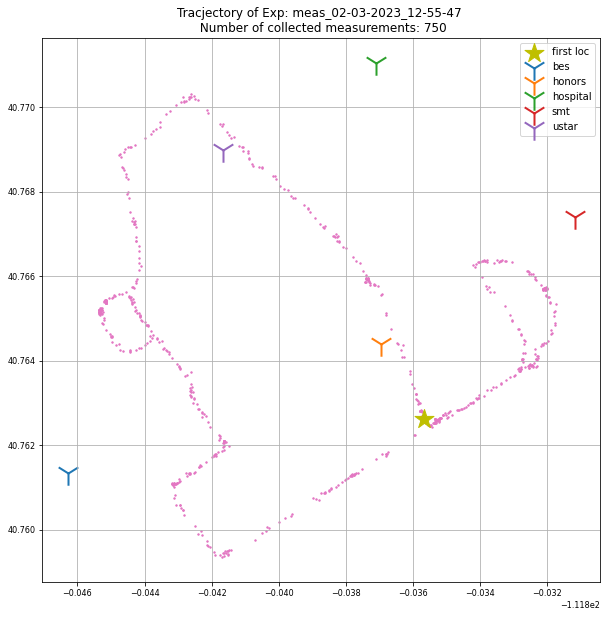

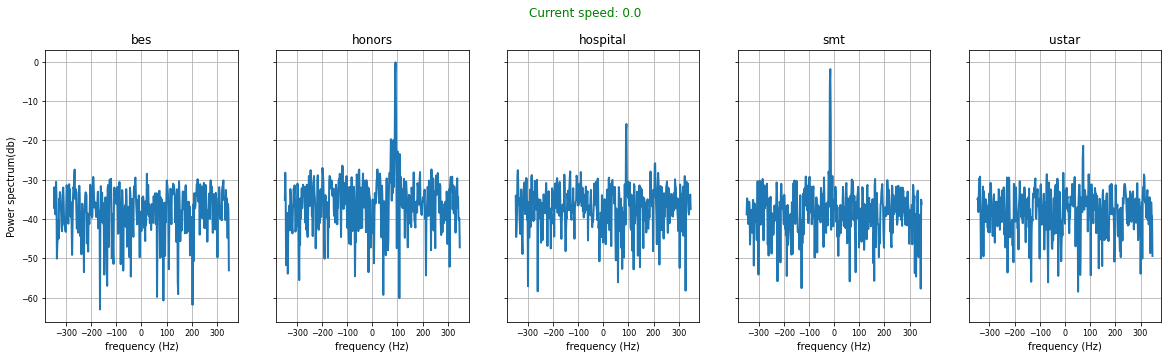

----------------------------------------------------------------------
 8 meas_02-03-2023_12-55-47 (750, 6)


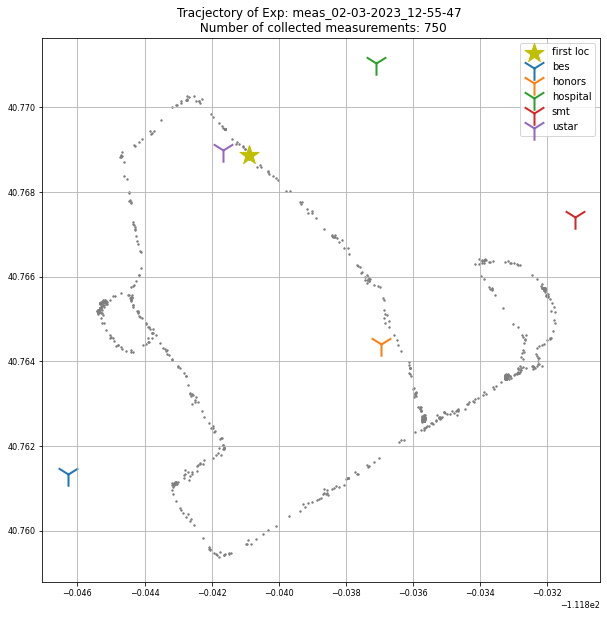

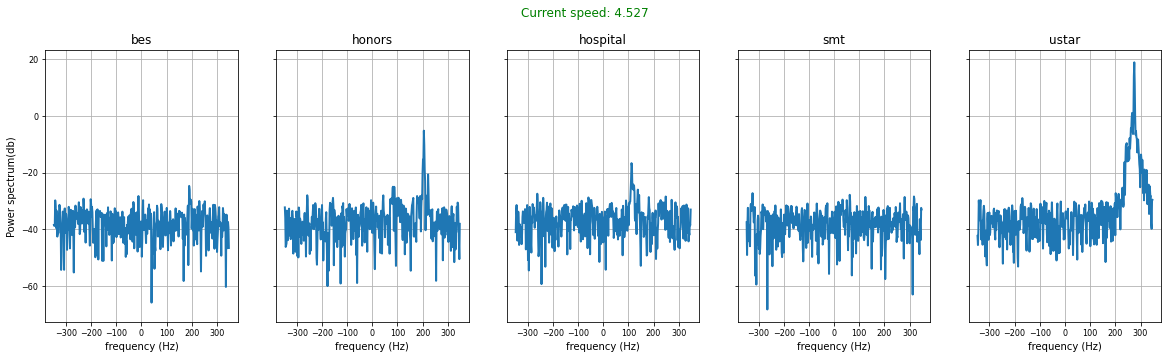

----------------------------------------------------------------------
 9 meas_02-06-2023_14-29-39 (499, 6)


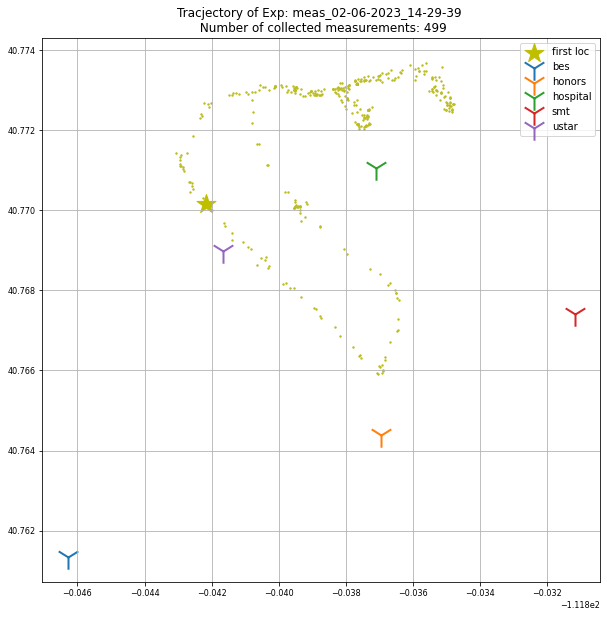

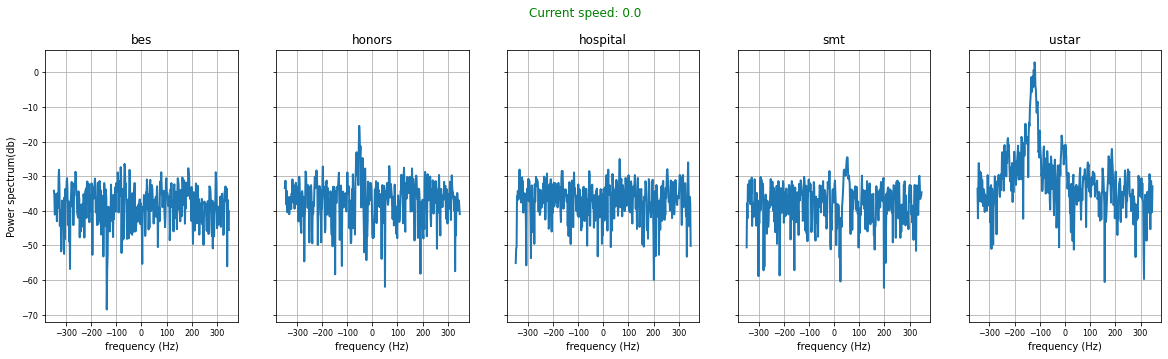

----------------------------------------------------------------------
 10 meas_02-09-2023_13-05-31 (500, 6)


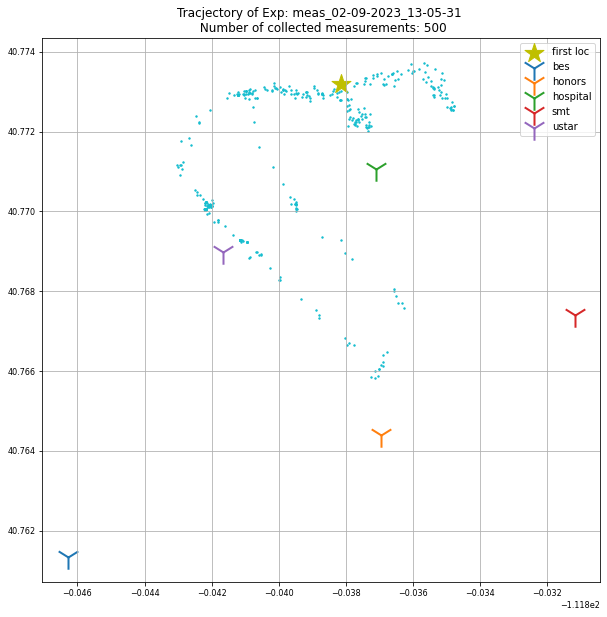

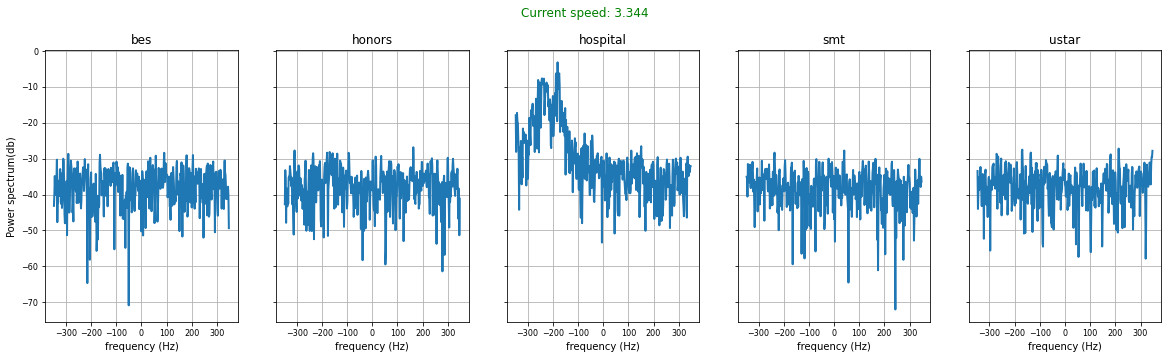

----------------------------------------------------------------------
 11 meas_02-09-2023_15-08-10 (499, 6)


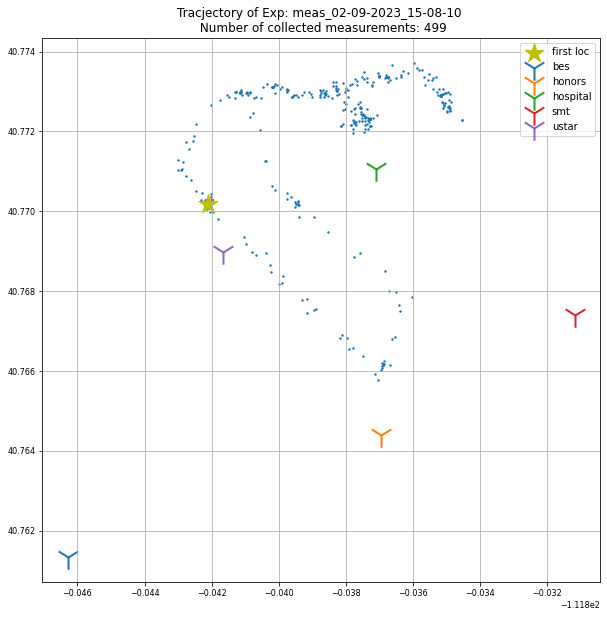

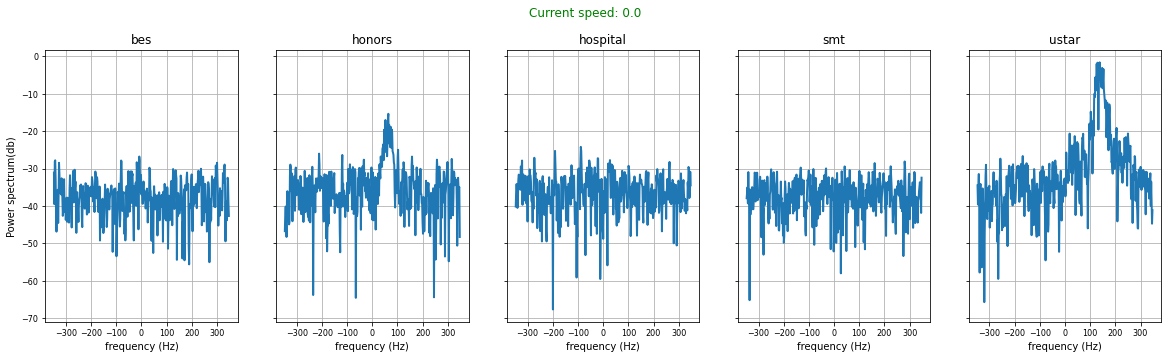

----------------------------------------------------------------------
 12 meas_02-09-2023_17-12-28 (365, 6)


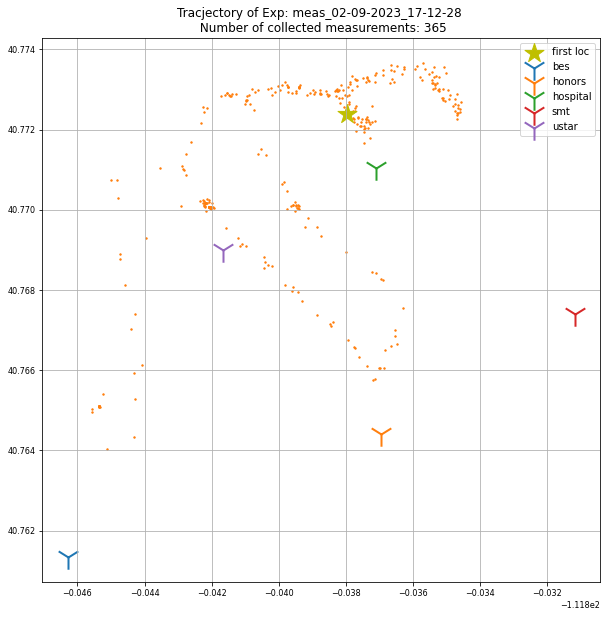

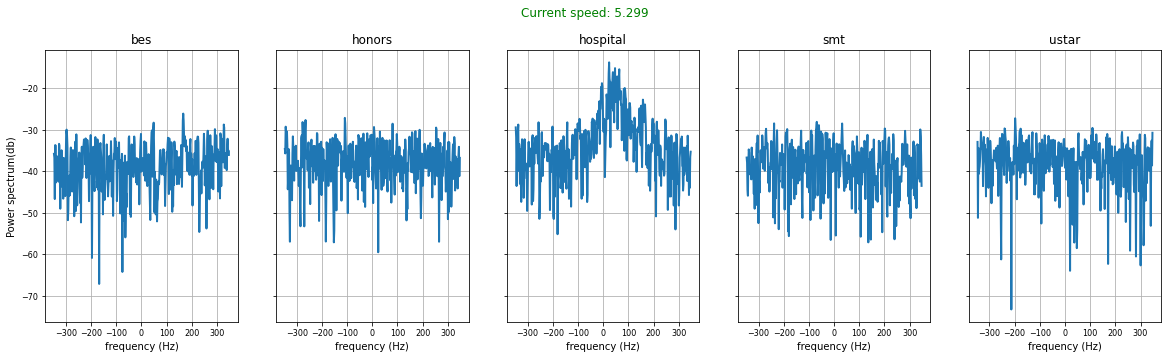

----------------------------------------------------------------------
 13 meas_02-14-2023_08-37-53 (500, 6)


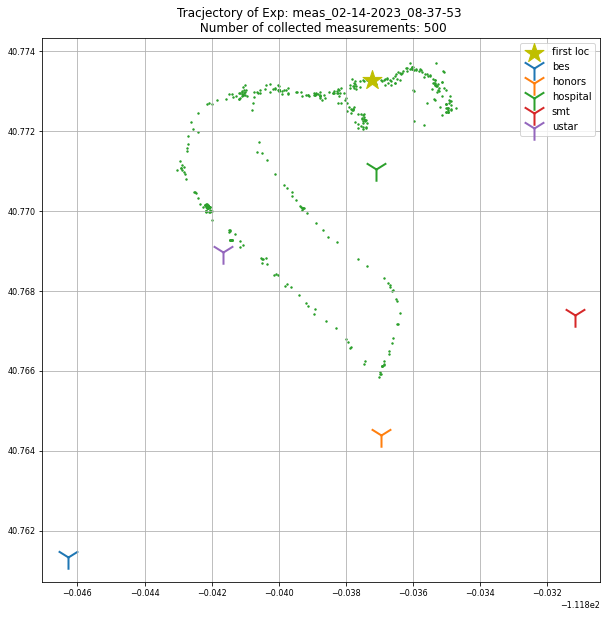

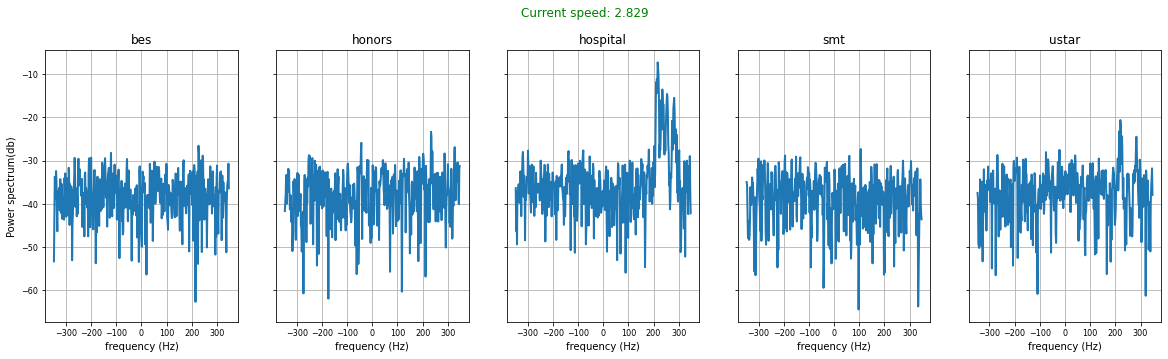

----------------------------------------------------------------------
 14 meas_02-14-2023_10-45-17 (500, 6)


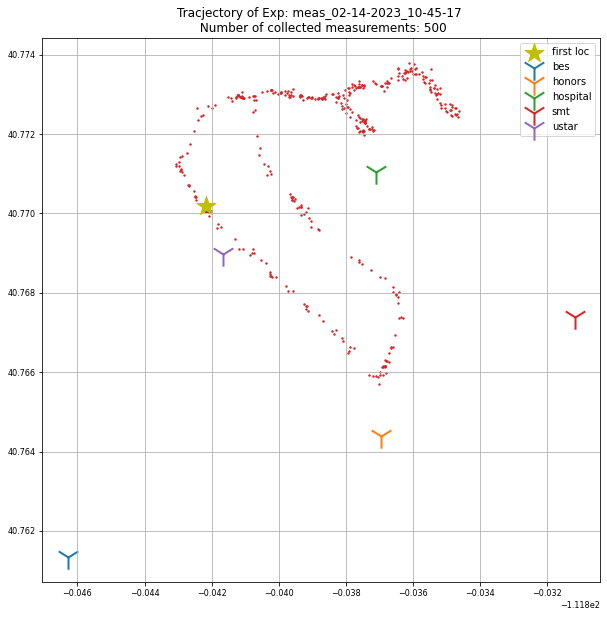

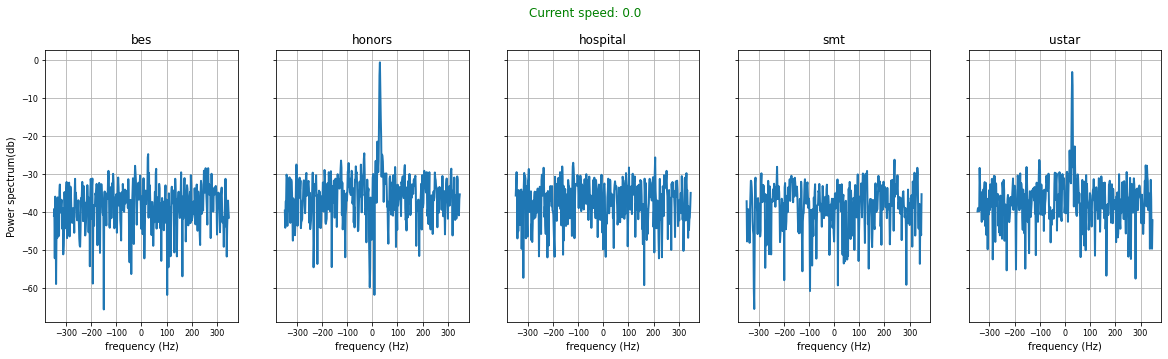

----------------------------------------------------------------------
 15 meas_02-14-2023_12-48-02 (500, 6)


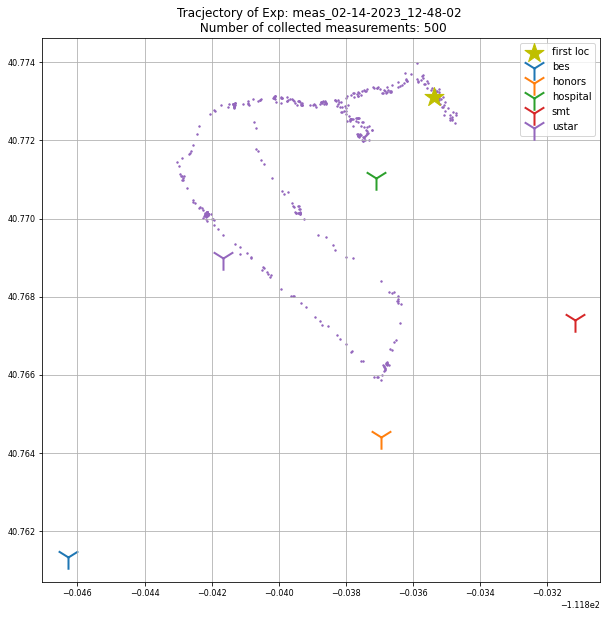

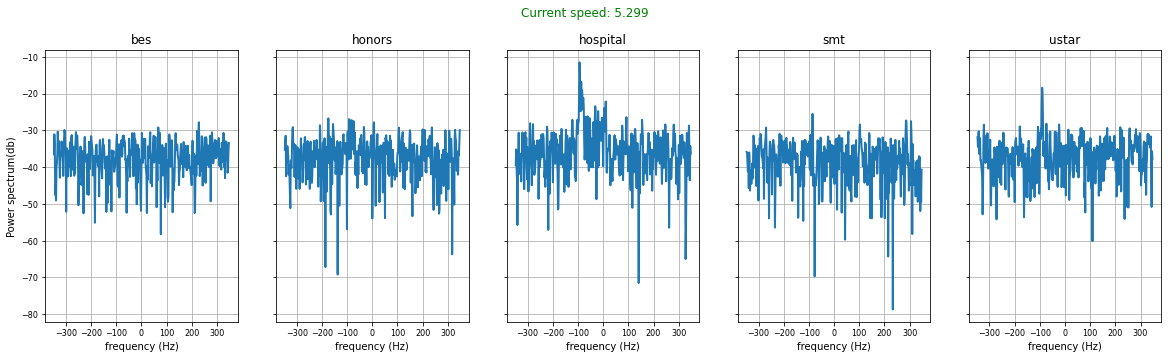

----------------------------------------------------------------------
 16 meas_02-14-2023_14-49-21 (495, 6)


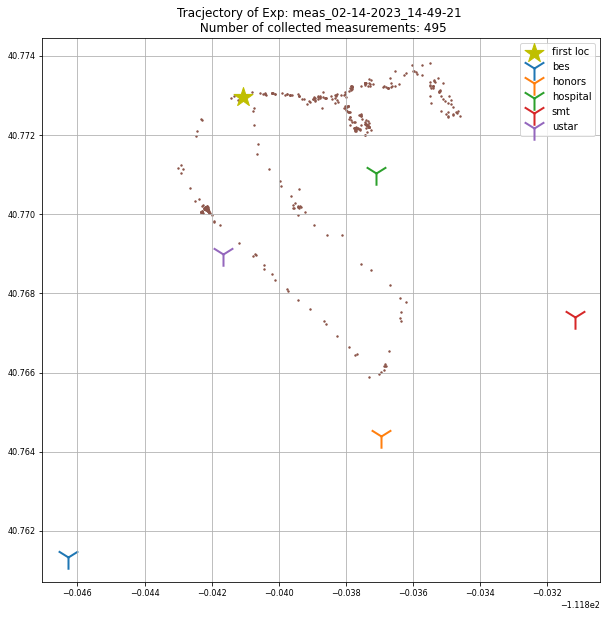

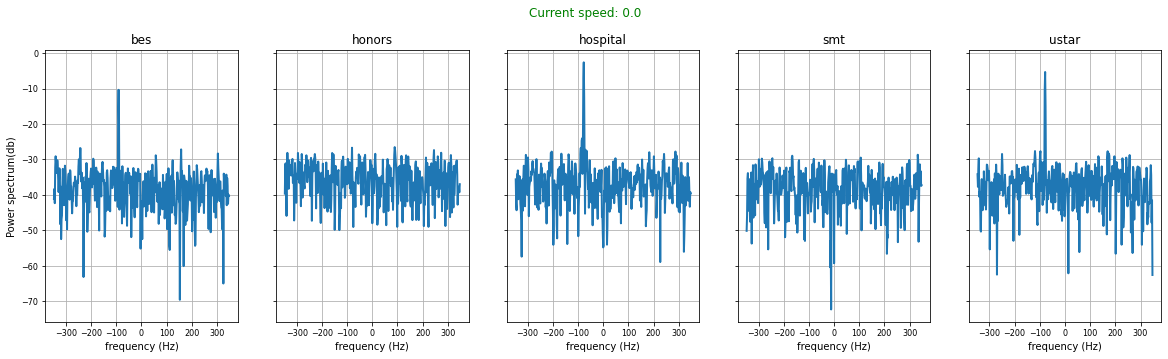

----------------------------------------------------------------------
 17 meas_02-14-2023_16-57-55 (475, 6)


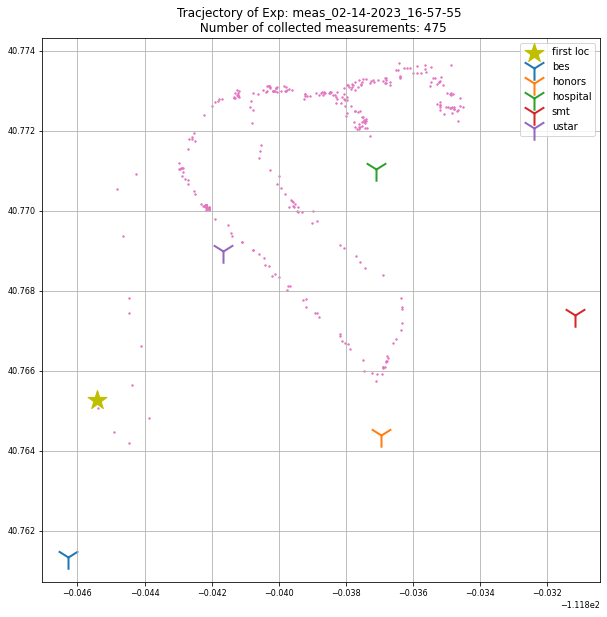

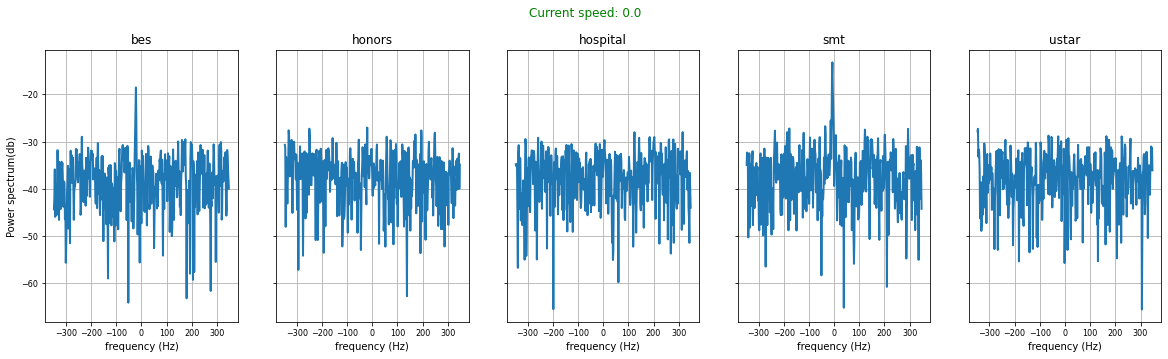

----------------------------------------------------------------------
 18 meas_02-14-2023_18-53-20 (100, 6)


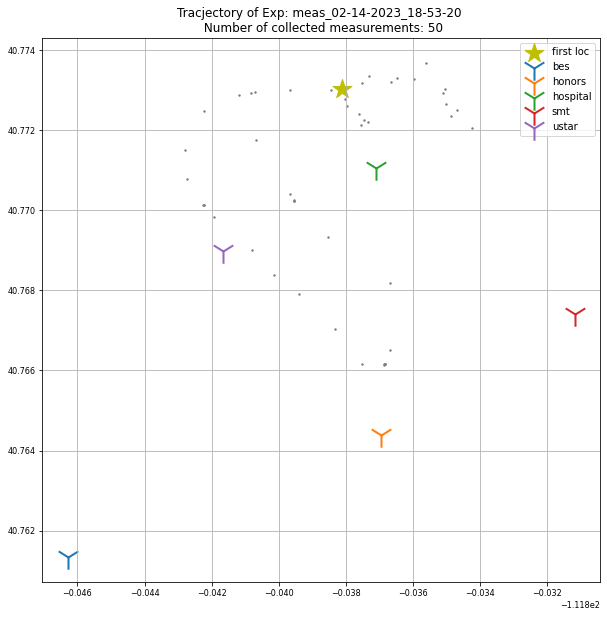

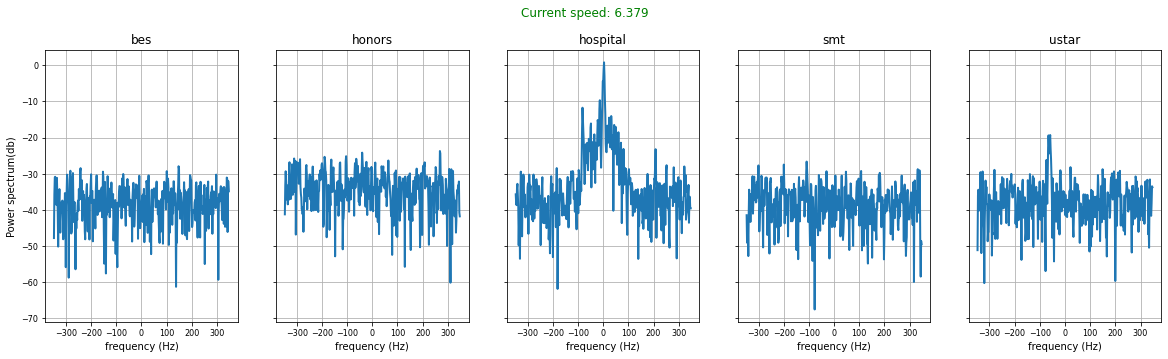

----------------------------------------------------------------------
 19 meas_02-16-2023_10-04-45 (500, 6)


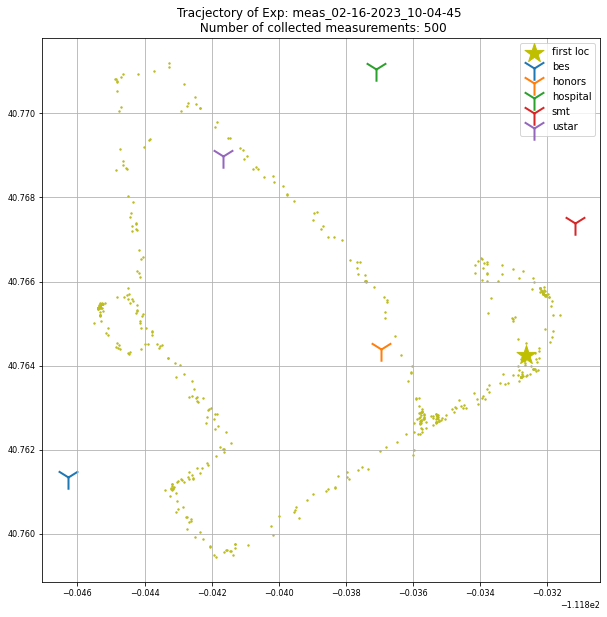

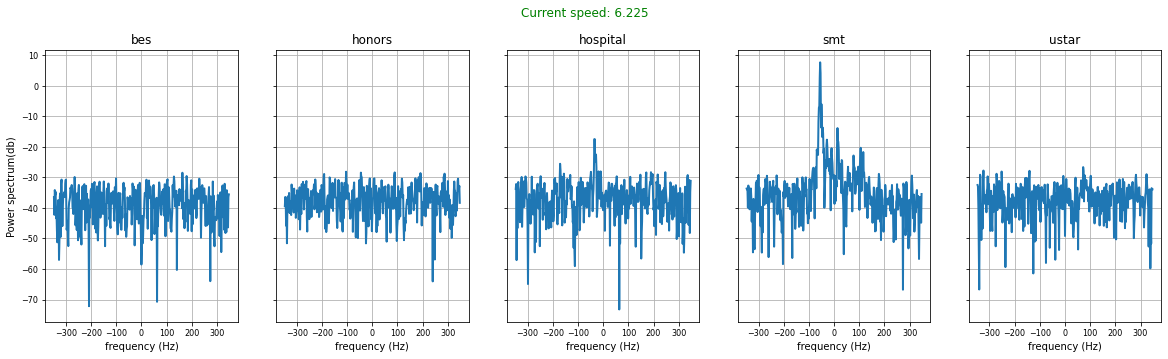

----------------------------------------------------------------------
 20 meas_02-16-2023_12-23-48 (500, 6)


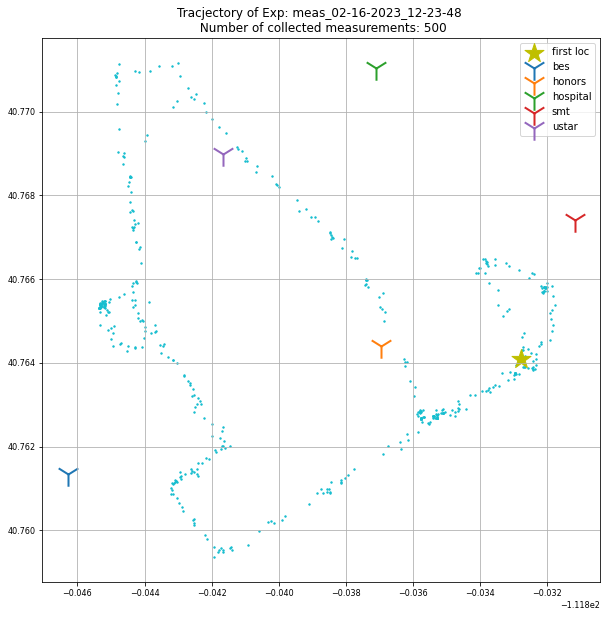

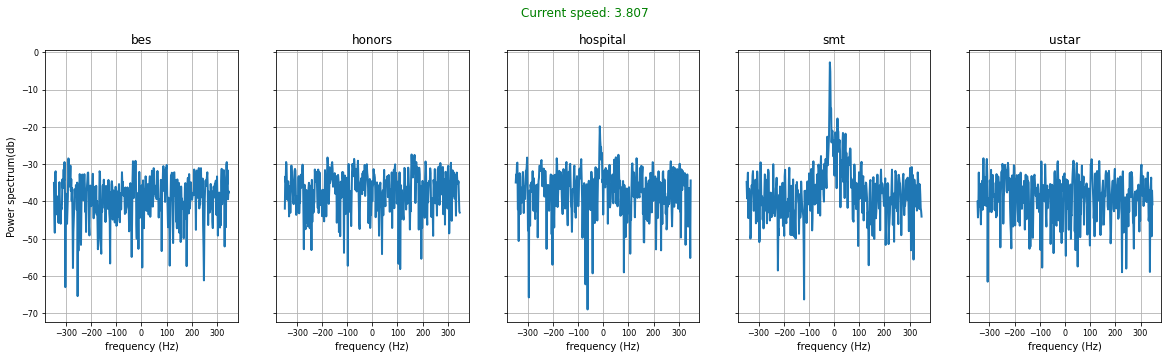

----------------------------------------------------------------------
 21 meas_02-16-2023_14-55-52 (500, 6)


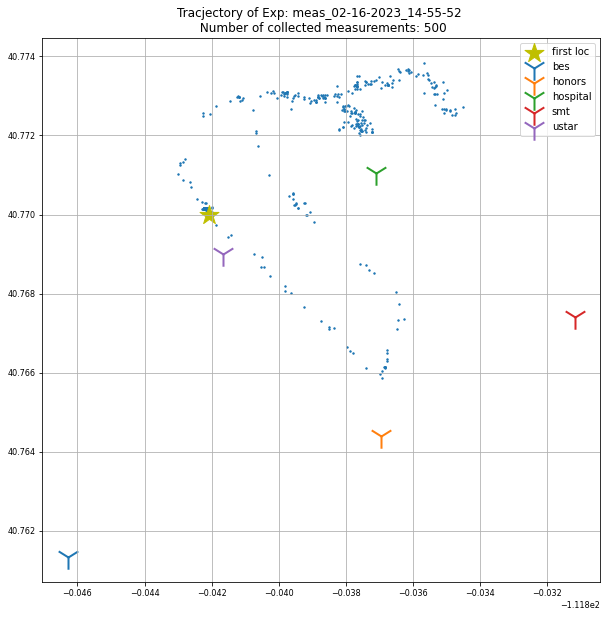

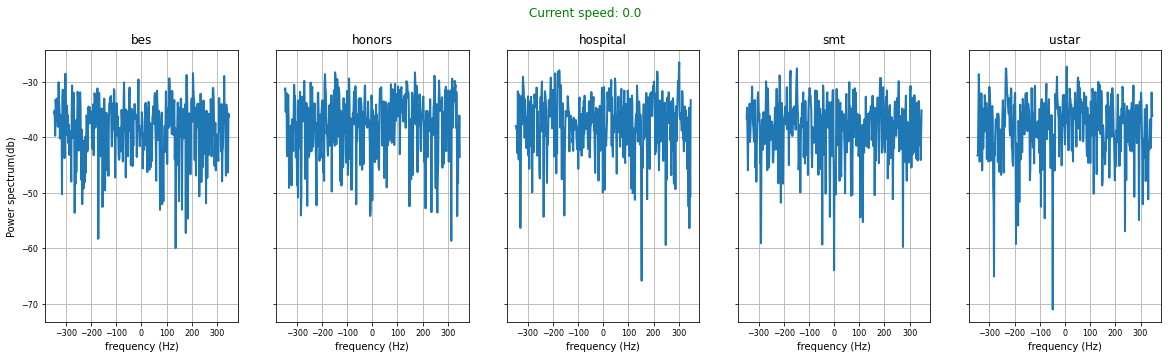

----------------------------------------------------------------------
 22 meas_02-16-2023_16-59-03 (500, 6)


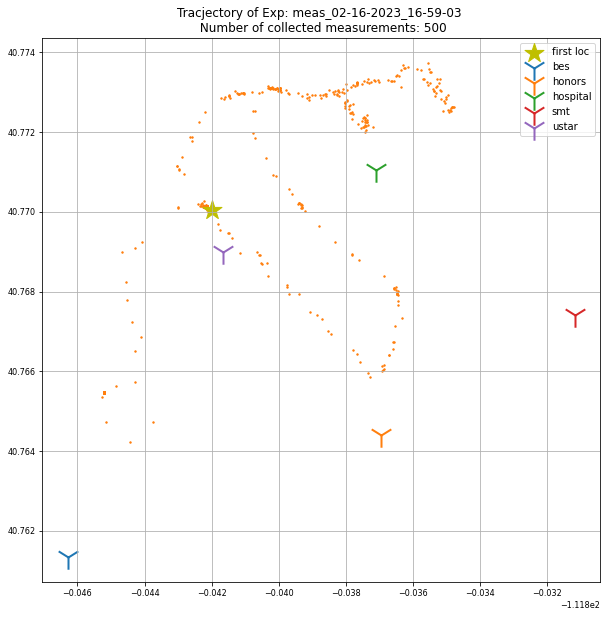

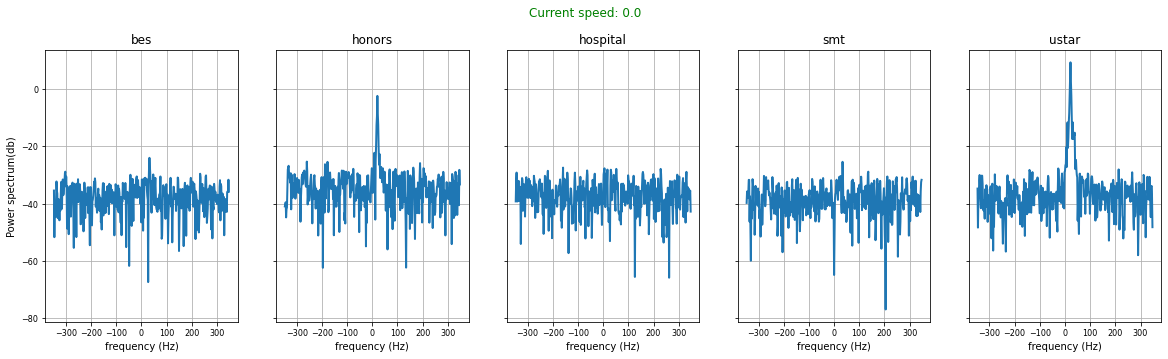

----------------------------------------------------------------------
 23 meas_02-16-2023_19-01-43 (100, 6)


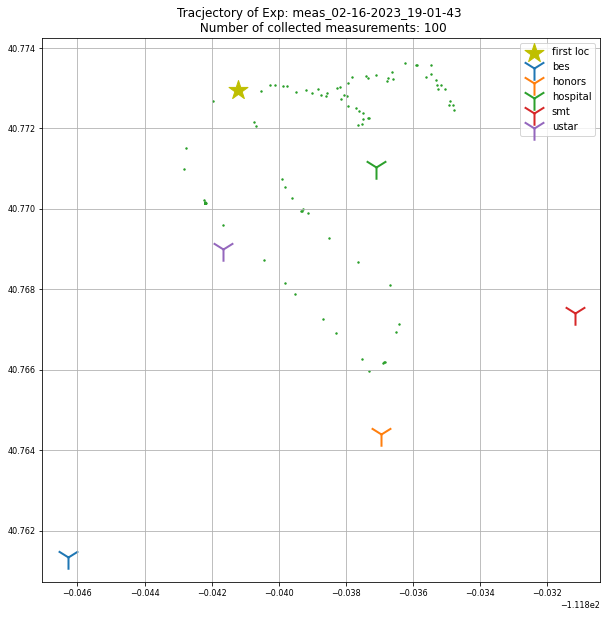

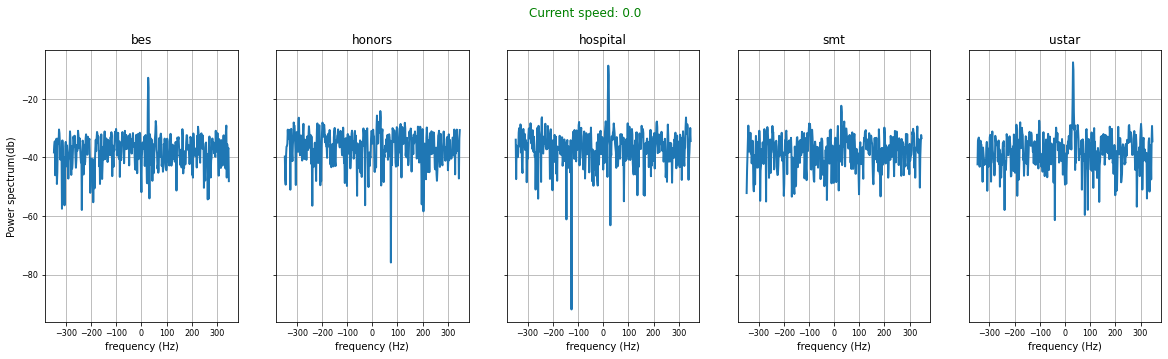

----------------------------------------------------------------------
 24 meas_02-16-2023_19-40-05 (100, 6)


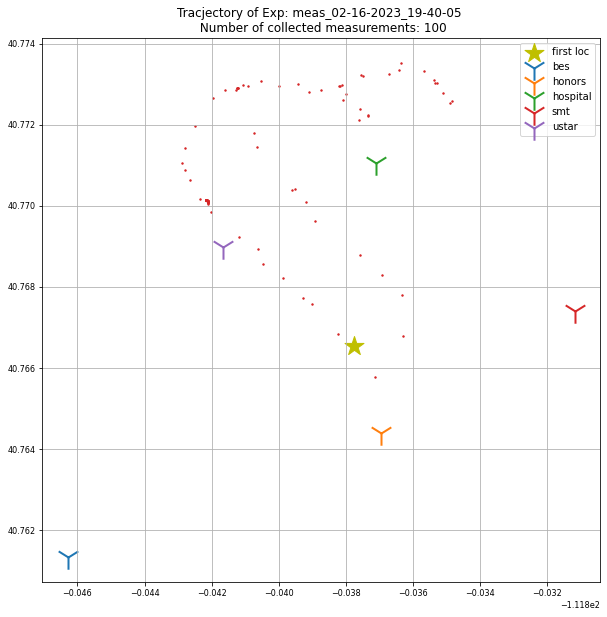

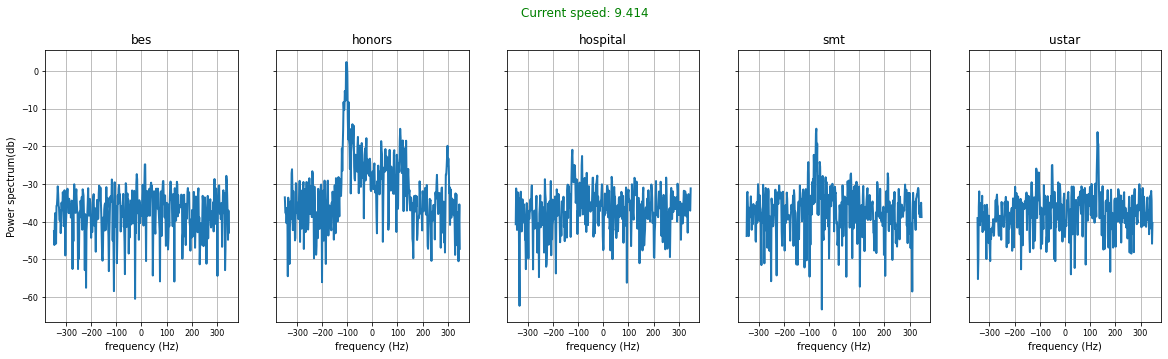


dataframe stacked all data ====> 
full_data_df shape: (10101, 6) 
full_data_df column names: Index(['cbrssdr1-bes-comp', 'cbrssdr1-honors-comp', 'cbrssdr1-hospital-comp',
       'cbrssdr1-smt-comp', 'cbrssdr1-ustar-comp', 'speed_postuple'],
      dtype='object') 
full_data_df example data label: [0.0, 41.2, (40.773238167, -111.83698725), '2023-01-30 16:04:37'] 
full_data_df each data length: (415,)


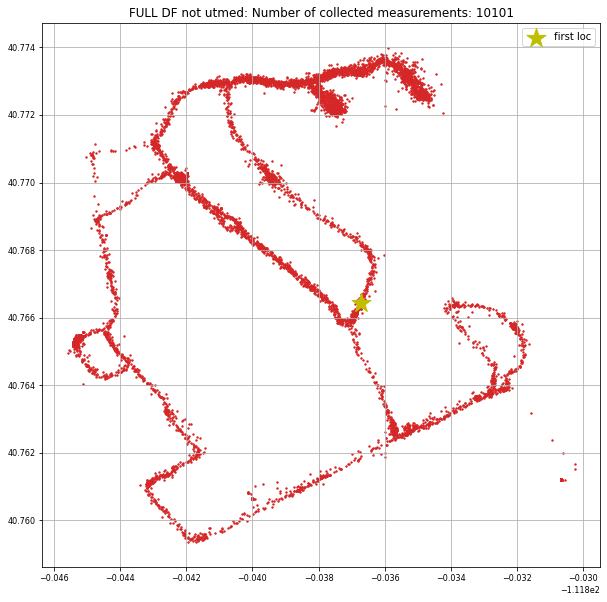

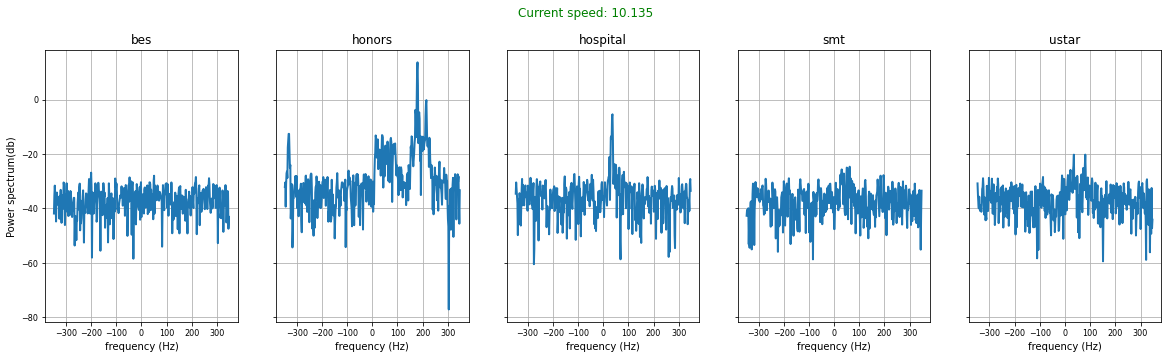

In [3]:
PSDDATADIR = './pickle_files'

psd_tagged_files = list(sorted(Path(PSDDATADIR).rglob('*.pickle')))
print("Time now  = ", datetime.datetime.now().strftime("%H:%M:%S"))
print("Files are = "), [print(ff) for ff in psd_tagged_files], print("\nTotal # of files in folder= ", len(psd_tagged_files), "\n")


full_data_df = pd.DataFrame()

for i, filename in enumerate(psd_tagged_files):
     
        
    fn = '_'.join( str(filename).split('Shout_')[1].split('_')[0:3] )
    loaded_data = pkl.load(open(filename, 'rb') )
    
    print("----------------------------------------------------------------------\n",i+1, fn, pd.DataFrame(loaded_data[0]).shape)
    
    ## Metadata of each experiment
    this_exp_metadata = loaded_data[1]
    
    ## Data for each experiment
    this_exp_data = loaded_data[0]
    this_exp_df   =  pd.DataFrame(this_exp_data)

    ## detour temp fix
    indexofdetour = this_exp_df.shape[0] if fn != 'meas_02-14-2023_18-53-20' else 50
    
    ## plots for each experiment
    ### non_utmed locations
    quickplot_labels_non_utmed_per_df(i, fn, this_exp_df.iloc[:indexofdetour]) 
#     ### utmed locations
#     quickplot_labels_tobeutmed_toshow(i, fn, this_exp_df["speed_postuple"].apply(lambda x: [x[0],x[1], utm.from_latlon(x[2][0], x[2][1])[0:2], x[3]]).iloc[:indexofdetour])
    ## plots only the top psd in df since the 'break' is active
    quickplot_spectrum(this_exp_df.iloc[:indexofdetour,:], this_exp_metadata) 
    
    ## concatenate
    full_data_df = pd.concat([full_data_df, this_exp_df.iloc[:indexofdetour, :]])

print("\ndataframe stacked all data ====>",
      "\nfull_data_df shape:", full_data_df.shape, 
      "\nfull_data_df column names:", full_data_df.columns, 
      "\nfull_data_df example data label:", full_data_df.iloc[95,-1], 
      "\nfull_data_df each data length:", full_data_df.iloc[95][0].shape)
# print("length should be", 500*11+200+100+100+1500+499+499+365+495+475+50+156+162)



quickplot_labels_non_utmed_full_df(i, full_data_df) # still non_utmed locations
# quickplot_labels_tobeutmed_toshow_full_df(i, full_data_df["speed_postuple"].apply(lambda x: [ x[0],x[1], utm.from_latlon(x[2][0], x[2][1])[0:2] , x[3] ] ))
quickplot_spectrum(full_data_df, this_exp_metadata) #prints only the top psd in df since the 'break' is active but metadata of first file is overwritten by last file's. 


In [4]:
full_data_df

,cbrssdr1-bes-comp,cbrssdr1-honors-comp,cbrssdr1-hospital-comp,cbrssdr1-smt-comp,cbrssdr1-ustar-comp,speed_postuple
0,[(0.007522114266747893+0.0029554503203103313j)...,[(-0.023358496245929707-0.008597240773240263j)...,"[(0.01051406073466662-0.015489521445658981j), ...","[(0.007340442450615447-0.000380776579926484j),...","[(0.02372704013807011+0.016430276061683024j), ...","[10.135, 198.6, (40.76642955, -111.83671055), ..."
1,[(-0.0073169581042672426-0.000285212958605089j...,[(-0.00017820257616873715-0.015659946496929773...,"[(0.012180199406238518+0.006247625683696382j),...","[(0.018142993514510052-0.005689597412837014j),...","[(0.012021398895027399-0.010740477858304877j),...","[0.566, 194.7, (40.7661364, -111.836832283), 2..."
2,[(0.0023406195890216474+0.017022848764935736j)...,[(-0.011861479716548436-0.025856430900815935j)...,"[(0.004503999825013603+0.01645755283781147j), ...",[(-0.0017555346169209085+0.0009542636433573436...,[(-0.005331110713455642-0.010598698440213137j)...,"[0.0, 194.7, (40.766125667, -111.836846383), 2..."
3,[(-0.021817178244440953+0.012529235305543862j)...,"[(0.007216606449330601-0.009943836909004373j),...",[(0.015665519883095093+0.0008202028480002279j)...,[(-0.0020658478111377854-0.00265128275775945j)...,"[(0.007856954608189203+0.006124106359575759j),...","[0.0, 194.7, (40.7661265, -111.836842333), 202..."
4,[(0.011192152245601338+0.0024621196275994486j)...,"[(-0.012050358424162747-0.01194127970689759j),...","[(0.016079473065731438-0.008859553269700062j),...","[(-0.01864077030164737-0.009151843361806671j),...",[(-0.01025914619791616-0.0013484699790256268j)...,"[0.0, 194.7, (40.76612675, -111.836840233), 20..."
...,...,...,...,...,...,...
95,"[(0.0005990943427877745+0.01023266654689497j),...",[(0.013305555536125648-0.0030164040171948344j)...,[(-0.009158735160910491-0.014398194331050804j)...,"[(0.006973168897232207+0.014225386300804685j),...",[(-0.00027311100761890625-0.004397639474913504...,"[13.015, 171.1, (40.771441, -111.840647517), 2..."
96,"[(0.01647723138888957-0.007573688440343673j), ...",[(-0.020818649921280574-0.0025433592329206626j...,[(-0.003333001413940711+0.010780467198272914j)...,[(-0.021485083093055884+0.013388702770767915j)...,[(-0.010312019121913743+0.0011990742870828732j...,"[3.601, 141.0, (40.770409117, -111.8395159), 2..."
97,[(0.014347530144479441+0.0019601747313940116j)...,[(-0.0006461712054035109+0.0017608043272917635...,[(-0.006601406093121409+0.015365344629821448j)...,[(0.0052592502601697295-0.007211004974724902j)...,[(0.00044013161279908455+0.009318715788075433j...,"[10.083, 141.0, (40.770100767, -111.839200067)..."
98,"[(0.010884782380966533+0.007681966221408202j),...","[(0.035788337401687464-0.0097453102579365j), (...","[(-0.01834316303023807-0.007981441771466835j),...","[(0.007255257774487841-0.00818770500387885j), ...","[(0.011406372575316912+0.010204243634056226j),...","[14.713, 129.1, (40.76879135, -111.837593383),..."
